# Supply Chain Data Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import textwrap 


In [2]:
df = pd.read_csv('Cleaned_DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns', None)
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Customer Id,Customer Fname,Customer Lname,Customer Segment,Department Name,Market,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order Status,Product Name,Product Price,Shipping Mode,Order_year,Shipping_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Puerto Rico,20755,Cally,Holloway,Consumer,Fitness,Pacific Asia,Indonesia,13.110000,0.04,0.29,1,Southeast Asia,COMPLETE,Smart watch,327.750000,Standard Class,2018,2018
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Puerto Rico,19492,Irene,Luna,Consumer,Fitness,Pacific Asia,India,16.389999,0.05,-0.80,1,South Asia,PENDING,Smart watch,327.750000,Standard Class,2018,2018
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,EE. UU.,19491,Gillian,Maldonado,Consumer,Fitness,Pacific Asia,India,18.030001,0.06,-0.80,1,South Asia,CLOSED,Smart watch,327.750000,Standard Class,2018,2018
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,EE. UU.,19490,Tana,Tate,Home Office,Fitness,Pacific Asia,Australia,22.940001,0.07,0.08,1,Oceania,COMPLETE,Smart watch,327.750000,Standard Class,2018,2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Puerto Rico,19489,Orli,Hendricks,Corporate,Fitness,Pacific Asia,Australia,29.500000,0.09,0.45,1,Oceania,PENDING_PAYMENT,Smart watch,327.750000,Standard Class,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,Fishing,EE. UU.,1005,Maria,Peterson,Home Office,Fan Shop,Pacific Asia,China,0.000000,0.00,0.10,1,Eastern Asia,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,2016,2016
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,Fishing,EE. UU.,9141,Ronald,Clark,Corporate,Fan Shop,Pacific Asia,JapÃ³n,4.000000,0.01,-1.55,1,Eastern Asia,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Second Class,2016,2016
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,Fishing,EE. UU.,291,John,Smith,Corporate,Fan Shop,Pacific Asia,Australia,8.000000,0.02,0.36,1,Oceania,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,2016,2016
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,Fishing,Puerto Rico,2813,Mary,Smith,Consumer,Fan Shop,Pacific Asia,Australia,12.000000,0.03,0.48,1,Oceania,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,Standard Class,2016,2016


# Check the information

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Customer Id,Customer Fname,Customer Lname,Customer Segment,Department Name,Market,Order Country,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Order Region,Order Status,Product Name,Product Price,Shipping Mode,Order_year,Shipping_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Puerto Rico,20755,Cally,Holloway,Consumer,Fitness,Pacific Asia,Indonesia,13.110000,0.04,0.29,1,Southeast Asia,COMPLETE,Smart watch,327.75,Standard Class,2018,2018
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Puerto Rico,19492,Irene,Luna,Consumer,Fitness,Pacific Asia,India,16.389999,0.05,-0.80,1,South Asia,PENDING,Smart watch,327.75,Standard Class,2018,2018
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,EE. UU.,19491,Gillian,Maldonado,Consumer,Fitness,Pacific Asia,India,18.030001,0.06,-0.80,1,South Asia,CLOSED,Smart watch,327.75,Standard Class,2018,2018
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,EE. UU.,19490,Tana,Tate,Home Office,Fitness,Pacific Asia,Australia,22.940001,0.07,0.08,1,Oceania,COMPLETE,Smart watch,327.75,Standard Class,2018,2018
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Puerto Rico,19489,Orli,Hendricks,Corporate,Fitness,Pacific Asia,Australia,29.500000,0.09,0.45,1,Oceania,PENDING_PAYMENT,Smart watch,327.75,Standard Class,2018,2018


In [4]:
df.columns 

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer Country',
       'Customer Id', 'Customer Fname', 'Customer Lname', 'Customer Segment',
       'Department Name', 'Market', 'Order Country', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Order Region', 'Order Status', 'Product Name',
       'Product Price', 'Shipping Mode', 'Order_year', 'Shipping_year'],
      dtype='object')

<AxesSubplot:>

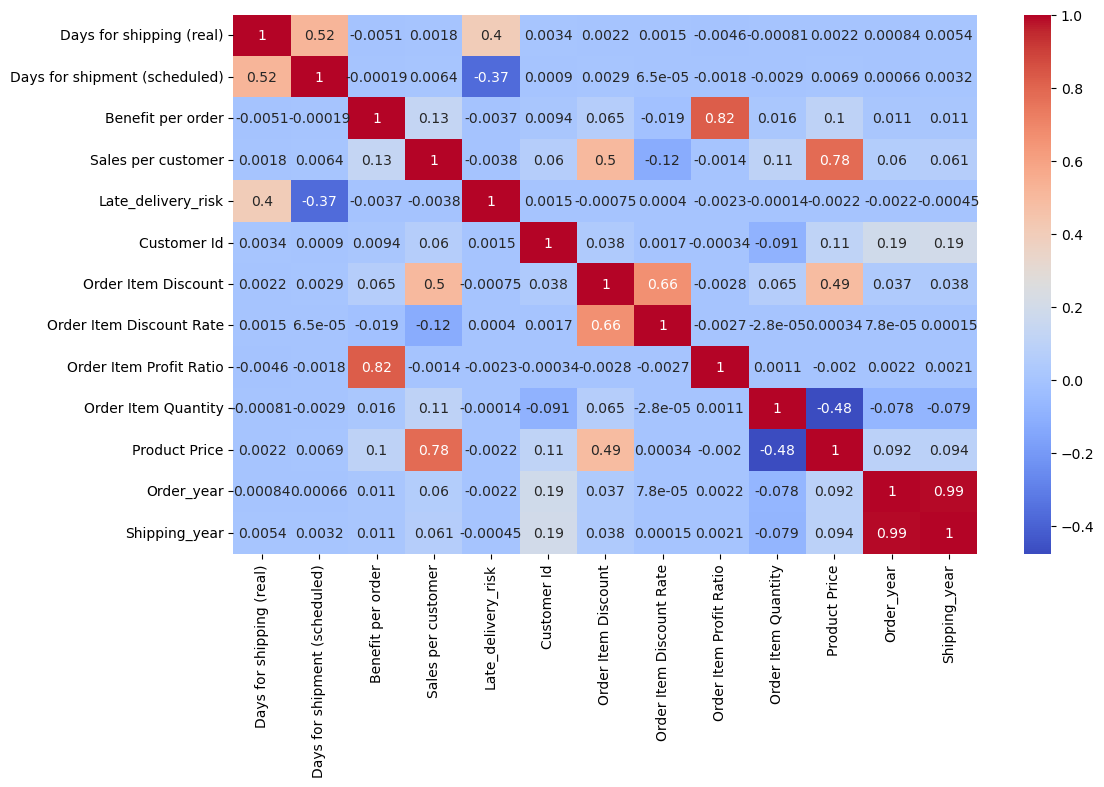

In [5]:
### Correlation Matrix 
fig, ax = plt.subplots(figsize= (12,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax = ax)

## Univariate Analysis

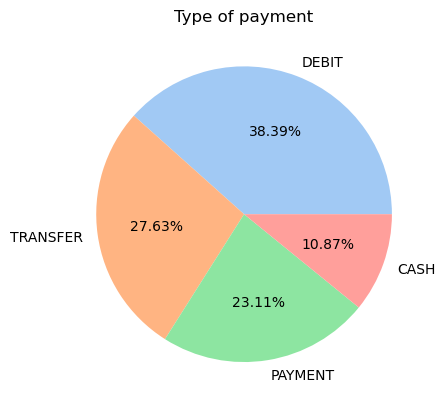

In [6]:
# Type of payment
color_palette = sns.color_palette("pastel")
plt.pie(df.Type.value_counts().values,labels=df.Type.value_counts().index,  autopct='%.2f%%', colors=color_palette)
plt.title("Type of payment")
plt.show()

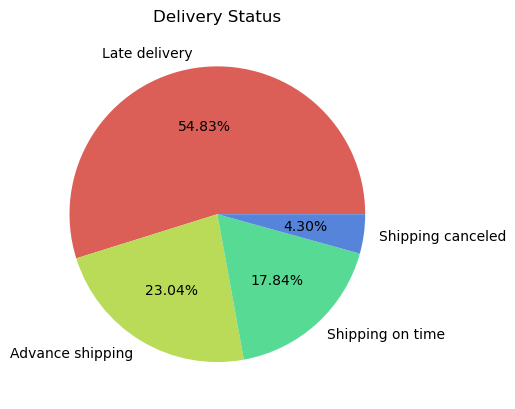

In [7]:
# Derlivery status
color_palette = sns.color_palette("hls", 5)
plt.pie(df['Delivery Status'].value_counts().values,labels=df['Delivery Status'].value_counts().index,  autopct='%.2f%%', colors=color_palette)
plt.title("Delivery Status")
plt.show()

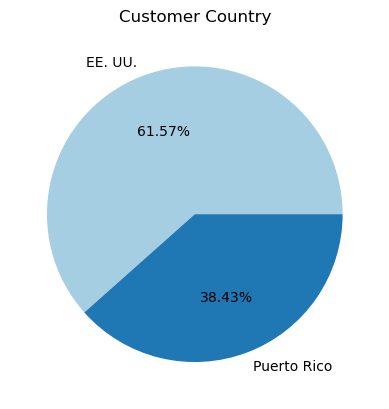

In [48]:
# Customer Country
custom_palette = sns.color_palette("Paired", 9)
plt.pie(df['Customer Country'].value_counts().values,labels=df['Customer Country'].value_counts().index,  autopct='%.2f%%', colors=custom_palette)
plt.title("Customer Country")
plt.show()

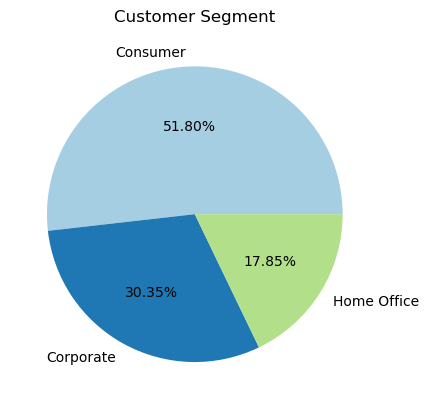

In [8]:
# Customer Segment
custom_palette = sns.color_palette("Paired", 9)
plt.pie(df['Customer Segment'].value_counts().values,labels=df['Customer Segment'].value_counts().index,  autopct='%.2f%%', colors=custom_palette)
plt.title("Customer Segment")
plt.show()

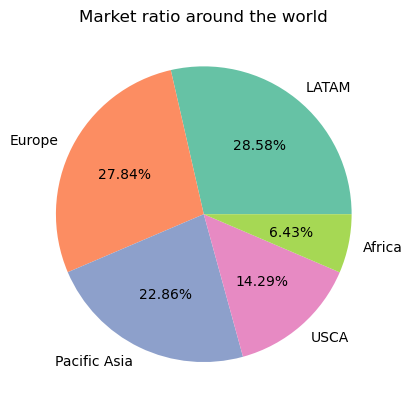

In [9]:
# Market
custom_palette = sns.color_palette("Set2", 12)
plt.pie(df['Market'].value_counts().values,labels=df['Market'].value_counts().index,  autopct='%.2f%%', colors=custom_palette)
plt.title("Market ratio around the world")
plt.show()

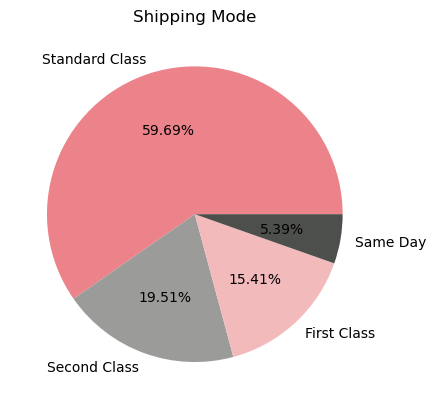

In [10]:
# Shipping Mode
custom_palette = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']
plt.pie(df['Shipping Mode'].value_counts().values,labels=df['Shipping Mode'].value_counts().index,  autopct='%.2f%%', colors=custom_palette)
plt.title("Shipping Mode")
plt.show()

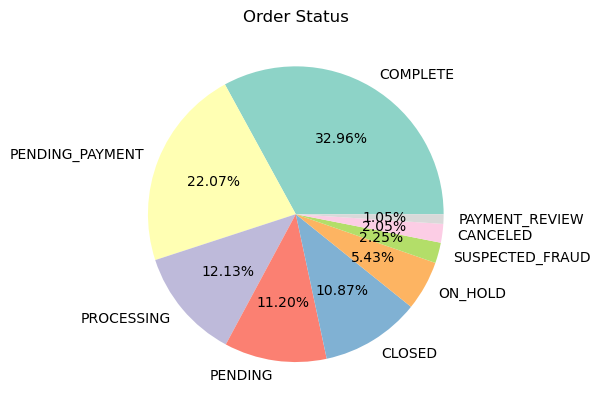

In [11]:
# Order Status
custom_palette = sns.color_palette("Set3")
plt.pie(df['Order Status'].value_counts().values,labels=df['Order Status'].value_counts().index,  autopct='%.2f%%', colors=custom_palette)
plt.title("Order Status")
plt.show()


In [50]:
# Order Country
df['Order Country'].value_counts()

Estados Unidos        24840
Francia               13222
MÃ©xico               13172
Alemania               9564
Australia              8497
                      ...  
Guinea Ecuatorial         2
Kuwait                    2
SÃ¡hara Occidental        2
Burundi                   1
Serbia                    1
Name: Order Country, Length: 164, dtype: int64

In [12]:
# Customer Id
df['Customer Id'].value_counts()

5654     47
10591    45
5004     45
5715     44
3708     44
         ..
18698     1
15537     1
15484     1
20681     1
2677      1
Name: Customer Id, Length: 20652, dtype: int64

In [13]:
# Category Name
df['Category Name'].value_counts()

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [14]:
# Department Name
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [15]:
# Product Name
df['Product Name'].value_counts()

Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
                                                 ...  
Stiga Master Series ST3100 Competition Indoor       27
SOLE E35 Elliptical                                 15
Bushnell Pro X7 Jolt Slope Rangefinder              11
Bowflex SelectTech 1090 Dumbbells                   10
SOLE E25 Elliptical                                 10
Name: Product Name, Length: 118, dtype: int64

In [16]:
# Numerical Columns Statistic Summery
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Product Price,Order_year,Shipping_year
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,21.974989,183.107609,0.548291,6691.379495,20.664741,0.101668,0.120647,2.127638,141.232550,2015.971150,2015.979404
std,1.623722,1.374449,104.433526,120.043670,0.497664,4162.918106,21.800901,0.070415,0.466796,1.453451,139.732492,0.829429,0.831962
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,1.000000,0.000000,0.000000,-2.750000,1.000000,9.990000,2015.000000,2015.000000
25%,2.000000,2.000000,7.000000,104.379997,0.000000,3258.500000,5.400000,0.040000,0.080000,1.000000,50.000000,2015.000000,2015.000000
50%,3.000000,4.000000,31.520000,163.990005,1.000000,6457.000000,14.000000,0.100000,0.270000,1.000000,59.990002,2016.000000,2016.000000
75%,5.000000,4.000000,64.800003,247.399994,1.000000,9779.000000,29.990000,0.160000,0.360000,3.000000,199.990005,2017.000000,2017.000000
max,6.000000,4.000000,911.799988,1939.989990,1.000000,20757.000000,500.000000,0.250000,0.500000,5.000000,1999.989990,2018.000000,2018.000000


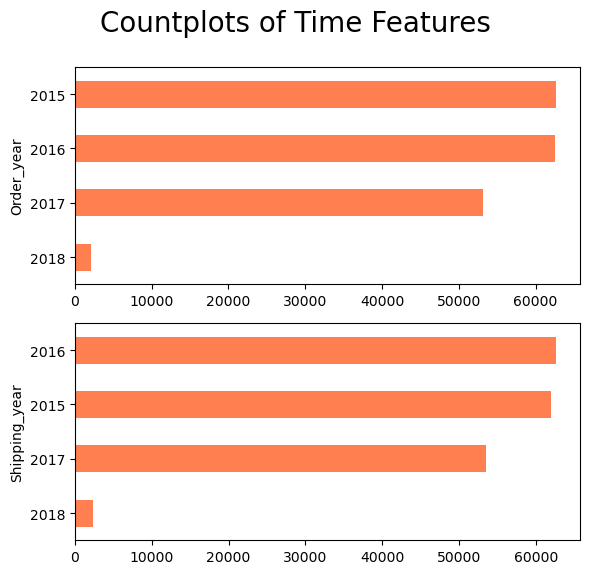

In [17]:
# Order year and Shipping year
time_cols = ['Order_year','Shipping_year']
# barplots for all time features
n=len(time_cols)
fig,ax = plt.subplots(n ,1, figsize=(6,n*3))

for i in range(n):
    plt.sca(ax[i])  #Set the current Axes to ax and the current Figure to the parent of ax
    col = time_cols[i]
    df.groupby(col)[col].count().sort_values().plot(kind= 'barh', color= '#FF7F50')
    fig.suptitle ('Countplots of Time Features', fontsize = 20)
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.98])

In [18]:
# Order years
df['Order_year'].value_counts()

2015    62650
2016    62550
2017    53196
2018     2123
Name: Order_year, dtype: int64

In [19]:
# Shipping year
df['Shipping_year'].value_counts()

2016    62602
2015    62002
2017    53546
2018     2369
Name: Shipping_year, dtype: int64

## Univariate Analysis Observations
-	Type: type of payment that has been used by customers, consists of Debit (38.39%), Transfer (27.63%), Payment or Pending payment (23.11%), and Cash (10.87%). 
-	Days for shipment (scheduled): the approximate days of shipping duration, mostly took 3-4 days.  
-	Days for shipping (real): actual shipping time duration, mostly only took 3 days, maximum 4 days. 
-	Benefit per order: profit and loss generated per order; the highest profit loss was 4275 dollars, and the highest profit generate was 912 dollars.
-	Sales per customer: the actual price customer paid for the product or the product price after the discount.
-	Delivery Status: Late delivery contains more than half the ratio (54.83%), 23.04% of Advance shipping, low rate of Shipping on time (17.84%), and only 4.30% shipping cancellation.
-	Late delivery risk: the number of days that late delivery will occurred. 
-	Category Name: 51 categories of the product, top 3 purchased categories are Cleats, Men’s Footwear, and Women’s Apparel.
-	Customer Country: countries of the customers who ordered the products, which are only from EE.UU. for 61.57% and from Puerto Rico for 38.43%.
-	Customer Id: unique customer ID to identify each customer which consist of 20,652 unique customer ID.
-	Customer Fname: customers’ first with a high rate of duplicate names.
-	Customer Lname: customers’ last name which missing values of 3.
-	Customer Segment: divided customers into 3 different segments which consist of 51.80% of Consumers, 30.35% of Corporate, and 17.85% of Home office. 
-	Department Name: types of the shops or product department categories including Fan Shop, Apparel, Golf, Footwear, Outdoors, Fitness, Discs Shop, Technology, Pet Shop, Book Shop, Health, and Beauty.
-	Market: heavy ratio of the market on both LATAM and Europe which is almost 30% each, and following by Pacific Asia, USCA, and Africa. These 3 markets contain 22.86%, 14.29%, and 6.43% in order. 
-	Order Country: the countries where customers ordered the product from, which are around 164 countries around the world.
-	Order Item Discount: the discount given to customers per sale. The highest given discount was $500.
-	Order Item Discount Rate: the rate of giving discounts to customers per order. 
-	Order Item Profit Ratio: the profit earned on a specific order item as a percentage of the item's revenue
-	Order Item Quantity: the quantity of the product that customers orders, most customer approximately order around 2 items.
-	Order Region: orders from all different regions around the world.
-	Order Status: 32.96% of the order has completed, and 22.07% are still Pending Payment. Processing, Pending, and Closed are sharing similar rates between 12% - 10 %. On hold order, Suspected Fraud, Cancel, and Payment on review range between 5% - 1%.
-	Product Name: several products ordered by customers which consist of 118 different products.
-	Product Price: the actual price of the product before the discount. The highest price was $2000, the lowest was $10, and product prices mostly range around $141.
-	Shipping Mode: 4 types of Shipping for customers to choose. Almost 60% of customers chose Standard Class, 19.51% chose Second Class, 15.41% chose First Class, and around 5.39% Same day delivery mode. 
-	Order_year: from 2015 – 2018, there were high volumes of sales in 2015.
-	Shipping_year: from 2015 – 2018, there were high volumes of shipping in 2016.


# Bivariate Analysis 

## Shipment Delay Analysis 

### Late Deliver by Order Country

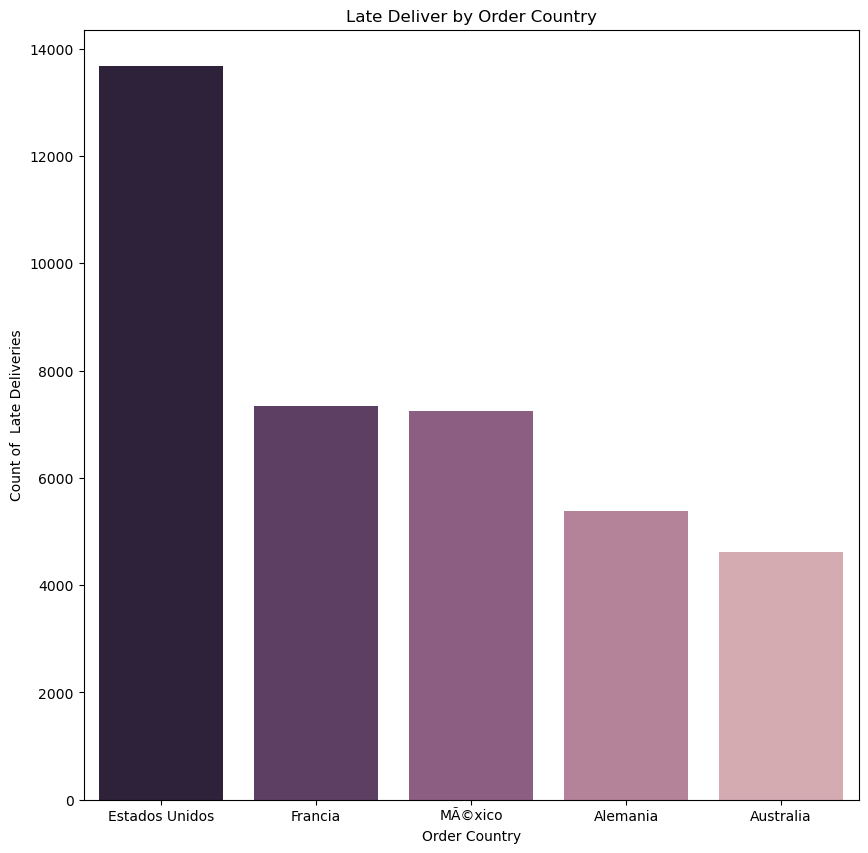

In [20]:
Late_country=df[['Delivery Status', 'Order Country']]
Latedeliver = Late_country[Late_country['Delivery Status'] == 'Late delivery']
Late = Latedeliver["Order Country"]
Country = Late.value_counts().rename_axis('Order_Country').reset_index(name='counts')
Country.sort_values(by='counts', ascending=False)
ct_top_5 = Country.head(n=5)
cubehelix_palette = sns.cubehelix_palette(reverse=True)
plt.figure(figsize=(10,10))
plt.title("Late Deliver by Order Country")
ax = sns.barplot(x='Order_Country', y='counts',data=ct_top_5,palette=cubehelix_palette)
plt.xlabel("Order Country")
plt.ylabel("Count of  Late Deliveries");
plt.show()

In [21]:
ct_top_5

,Order_Country,counts
0,Estados Unidos,13670
1,Francia,7341
2,MÃ©xico,7246
3,Alemania,5383
4,Australia,4613


### Late Delivery by Product Name

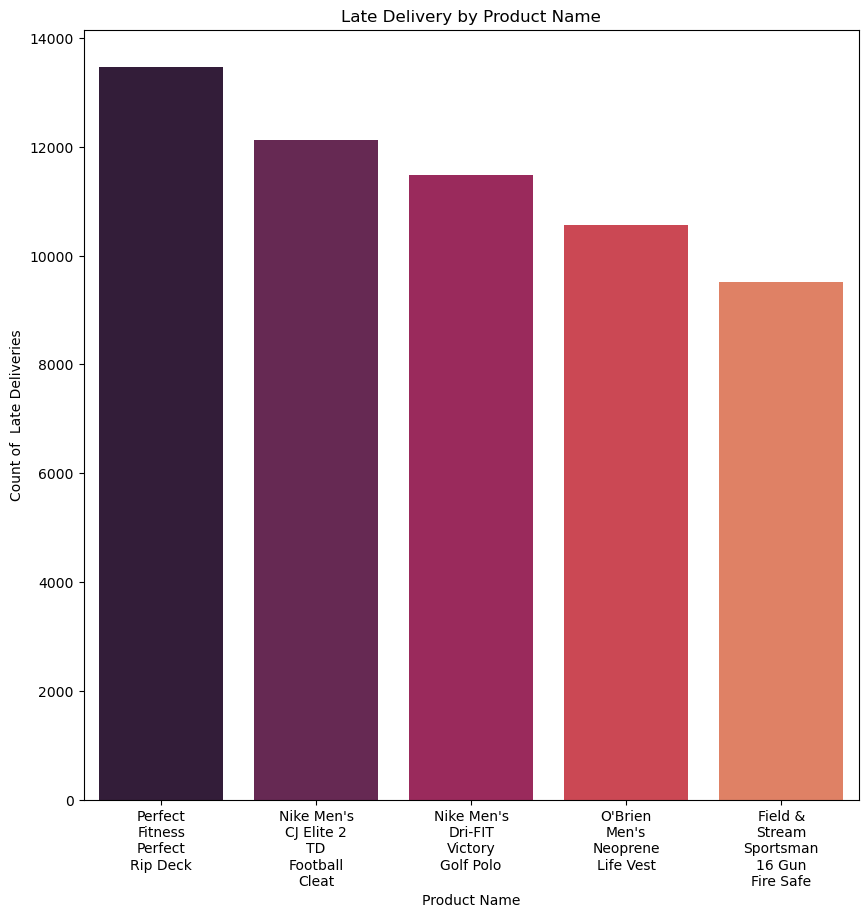

In [22]:
Product=df[['Delivery Status', 'Product Name']]
Late_product = Product[Product['Delivery Status'] == 'Late delivery']
Lateproduct = Late_product["Product Name"]
PD = Lateproduct.value_counts().rename_axis('Product_Name').reset_index(name='counts')
PD.sort_values(by='counts', ascending=False)
pd_top_5 = PD.head(n=5)
custom_palette = sns.color_palette("rocket")
plt.figure(figsize=(10,10))
plt.title("Late Delivery by Product Name")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in pd_top_5['Product_Name']]
ax = sns.barplot(x=wrapped_labels, y='counts', data=pd_top_5, palette=custom_palette)
ax.set_ylabel('Population')
plt.xlabel("Product Name")
plt.ylabel("Count of  Late Deliveries");
plt.show()


In [23]:
pd_top_5

,Product_Name,counts
0,Perfect Fitness Perfect Rip Deck,13473
1,Nike Men's CJ Elite 2 TD Football Cleat,12121
2,Nike Men's Dri-FIT Victory Golf Polo,11476
3,O'Brien Men's Neoprene Life Vest,10565
4,Field & Stream Sportsman 16 Gun Fire Safe,9516


## Shipment cancellation Cancellation Analysis

### Shipment cancellation by Product name

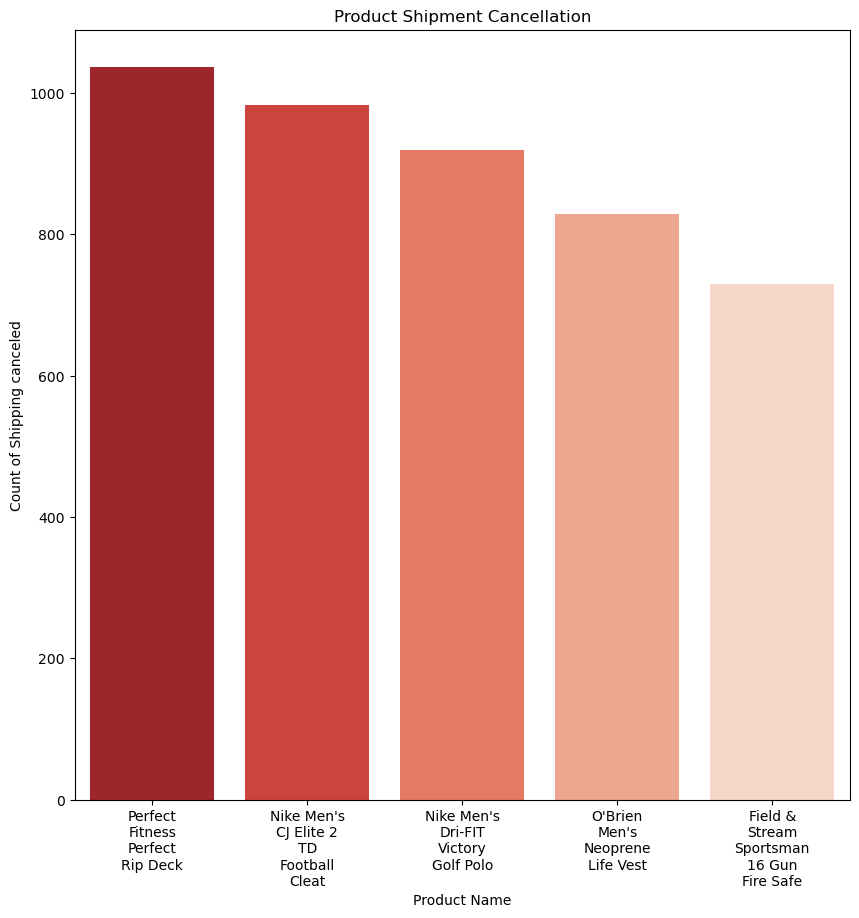

In [24]:
Cancel_product = Product[Product['Delivery Status'] == 'Shipping canceled']
Cancelproduct = Cancel_product["Product Name"]
CC = Cancelproduct.value_counts().rename_axis('Product_Name').reset_index(name='counts')
CC.sort_values(by='counts', ascending=False)
cc_top_5 = CC.head(n=5)
red_palette = sns.color_palette("Reds_r", n_colors=5)
plt.figure(figsize=(10,10))
plt.title("Product Shipment Cancellation")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in cc_top_5['Product_Name']]
ax = sns.barplot(x=wrapped_labels, y='counts', data=cc_top_5,palette=red_palette)
ax.set_ylabel('Population')
plt.xlabel("Product Name")
plt.ylabel("Count of Shipping canceled");
plt.show()

In [25]:
cc_top_5

,Product_Name,counts
0,Perfect Fitness Perfect Rip Deck,1037
1,Nike Men's CJ Elite 2 TD Football Cleat,983
2,Nike Men's Dri-FIT Victory Golf Polo,919
3,O'Brien Men's Neoprene Life Vest,828
4,Field & Stream Sportsman 16 Gun Fire Safe,730


### Shipment cancellation by Customers

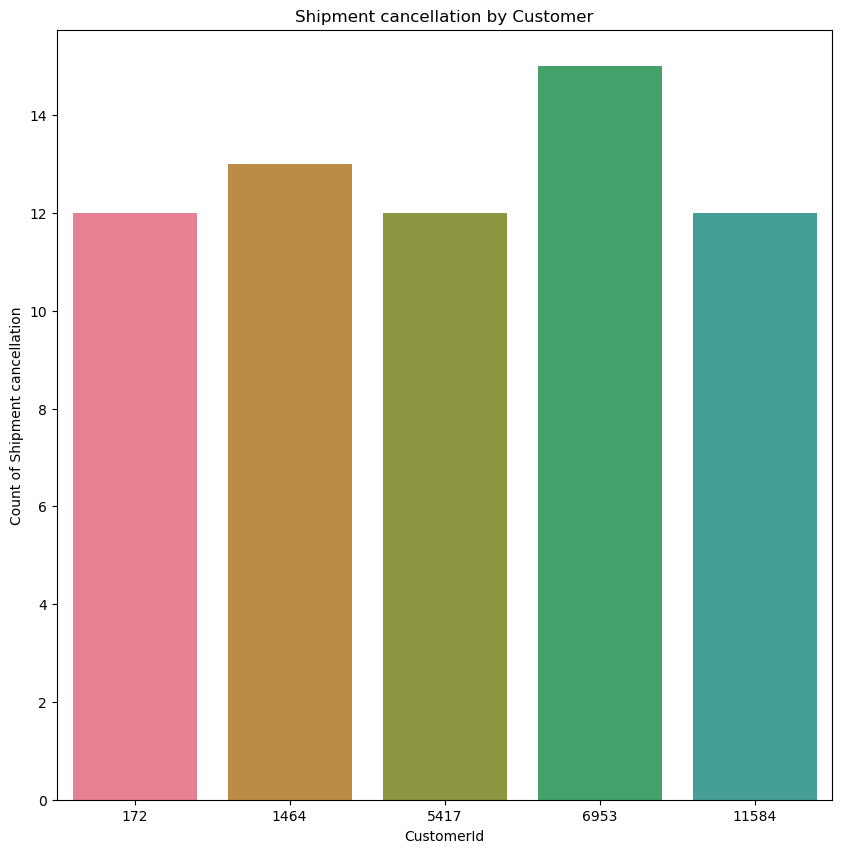

In [26]:
Customer_Cancel=df[['Delivery Status', 'Customer Id']]
CustomerCancel = Customer_Cancel[Customer_Cancel['Delivery Status'] == 'Shipping canceled']
Cancel = CustomerCancel["Customer Id"]
ID = Cancel.value_counts().rename_axis('Customer_Id').reset_index(name='counts')
ID.sort_values(by='counts', ascending=False)
id_top_5 = ID.head(n=5)
custom_palette = sns.color_palette("husl", 8)
plt.figure(figsize=(10,10))
plt.title("Shipment cancellation by Customer")
ax = sns.barplot(x='Customer_Id', y='counts',data=id_top_5,palette=custom_palette)
plt.xlabel("CustomerId")
plt.ylabel("Count of Shipment cancellation");
plt.show()

In [27]:
id_top_5

,Customer_Id,counts
0,6953,15
1,1464,13
2,172,12
3,11584,12
4,5417,12


In [28]:
ct_id = df[['Customer Id', 'Customer Fname', 'Customer Lname']]
ct_id = ct_id.loc[ct_id['Customer Id'] == 6953, ['Customer Id', 'Customer Fname', 'Customer Lname']]
ct_id.iloc[0]

Customer Id           6953
Customer Fname    Benjamin
Customer Lname       Smith
Name: 51098, dtype: object

## Profit and Loss Analysis

### Most profitable products

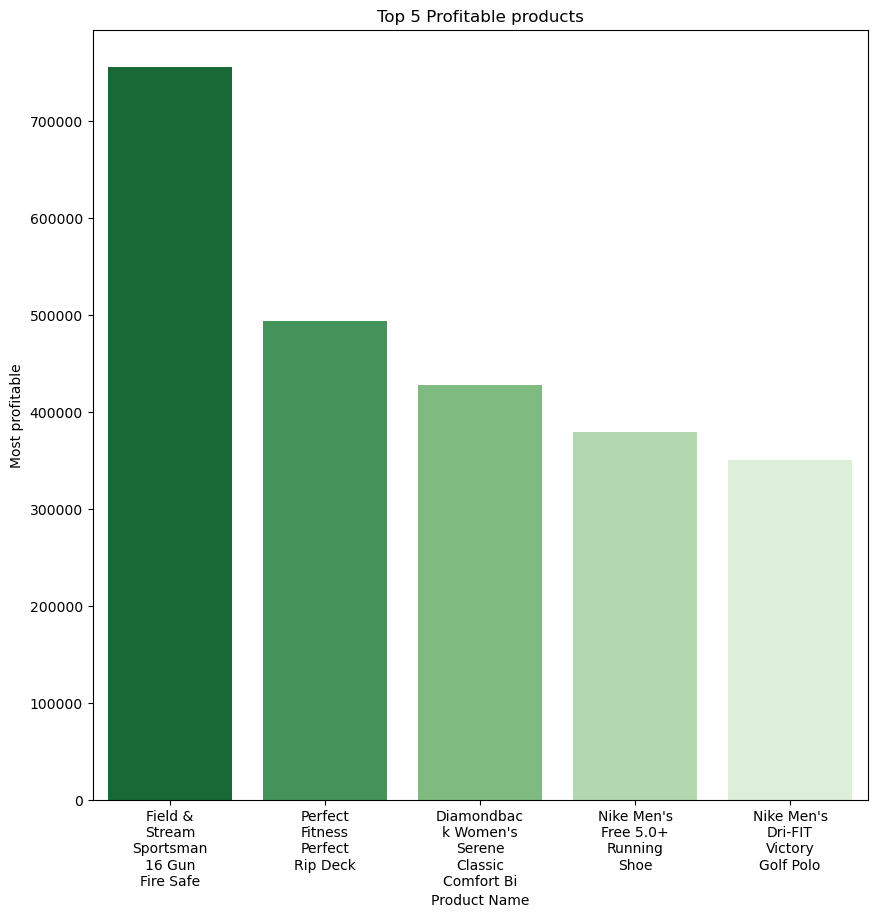

In [29]:
product_cc = df.groupby('Product Name')['Benefit per order'].sum().reset_index(name='total_benefit')
top_5_high = product_cc.sort_values(by='total_benefit', ascending=False).head(n=5)
green_palette = sns.color_palette("Greens_r", 5)
plt.figure(figsize=(10,10))
plt.title("Top 5 Profitable products")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in top_5_high['Product Name']]
ax = sns.barplot(x=wrapped_labels, y='total_benefit', data=top_5_high,palette=green_palette)
ax.set_ylabel('Population')
plt.xlabel("Product Name")
plt.ylabel("Most profitable");
plt.show()

In [30]:
top_5_high

,Product Name,total_benefit
24,Field & Stream Sportsman 16 Gun Fire Safe,756220.767190
71,Perfect Fitness Perfect Rip Deck,493828.299782
21,Diamondback Women's Serene Classic Comfort Bi,427455.568106
61,Nike Men's Free 5.0+ Running Shoe,379915.818503
59,Nike Men's Dri-FIT Victory Golf Polo,350421.029567


### The profit lost according late delivery

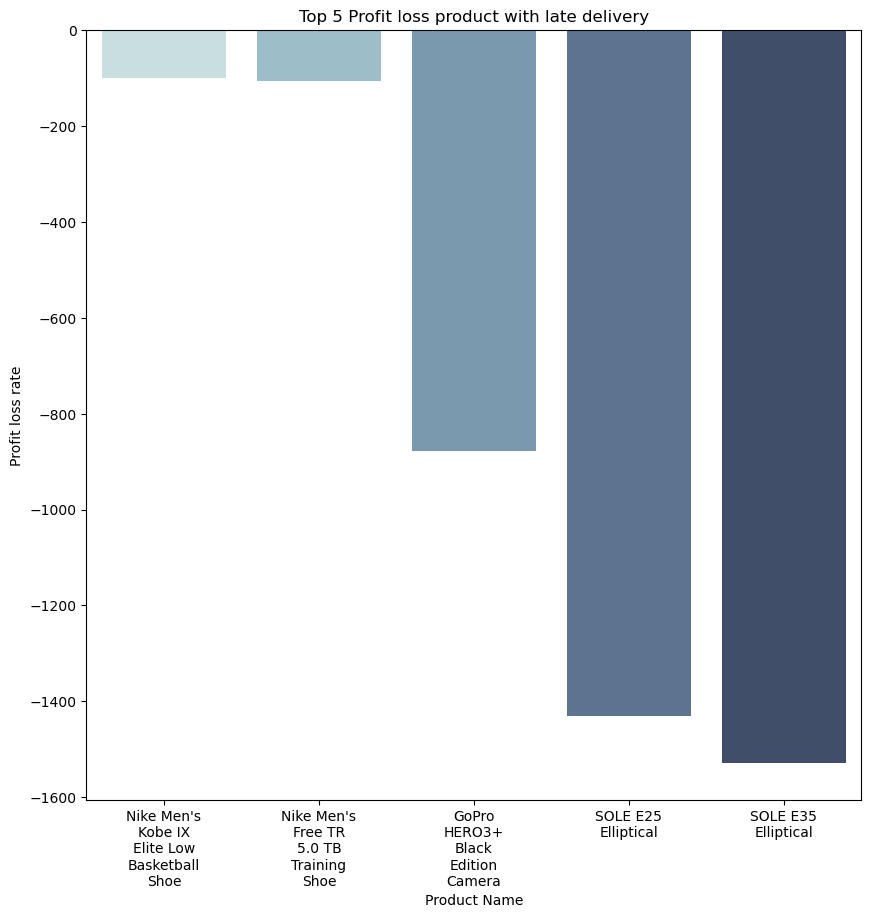

In [31]:
delay_sales = df[['Delivery Status', 'Product Name', 'Benefit per order']]
late_deliveries = delay_sales[delay_sales['Delivery Status'] == 'Late delivery']
product_benefit = late_deliveries.groupby('Product Name')['Benefit per order'].sum().reset_index(name='total_loss')
top_5_products = product_benefit.sort_values(by='total_loss', ascending=False).tail(n=5)
cubehelix_palette=sns.cubehelix_palette(rot=-.2)
plt.figure(figsize=(10,10))
plt.title("Top 5 Profit loss product with late delivery")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in top_5_products['Product Name']]
ax = sns.barplot(x=wrapped_labels, y='total_loss', data=top_5_products,palette=cubehelix_palette)
ax.set_ylabel('Population')
plt.xlabel("Product Name")
plt.ylabel("Profit loss rate");
plt.show()

In [32]:
top_5_products

,Product Name,total_loss
63,Nike Men's Kobe IX Elite Low Basketball Shoe,-100.090009
62,Nike Men's Free TR 5.0 TB Training Shoe,-106.410032
36,GoPro HERO3+ Black Edition Camera,-878.229954
76,SOLE E25 Elliptical,-1429.940002
77,SOLE E35 Elliptical,-1529.040023


### The profit loss according shipping cancellation

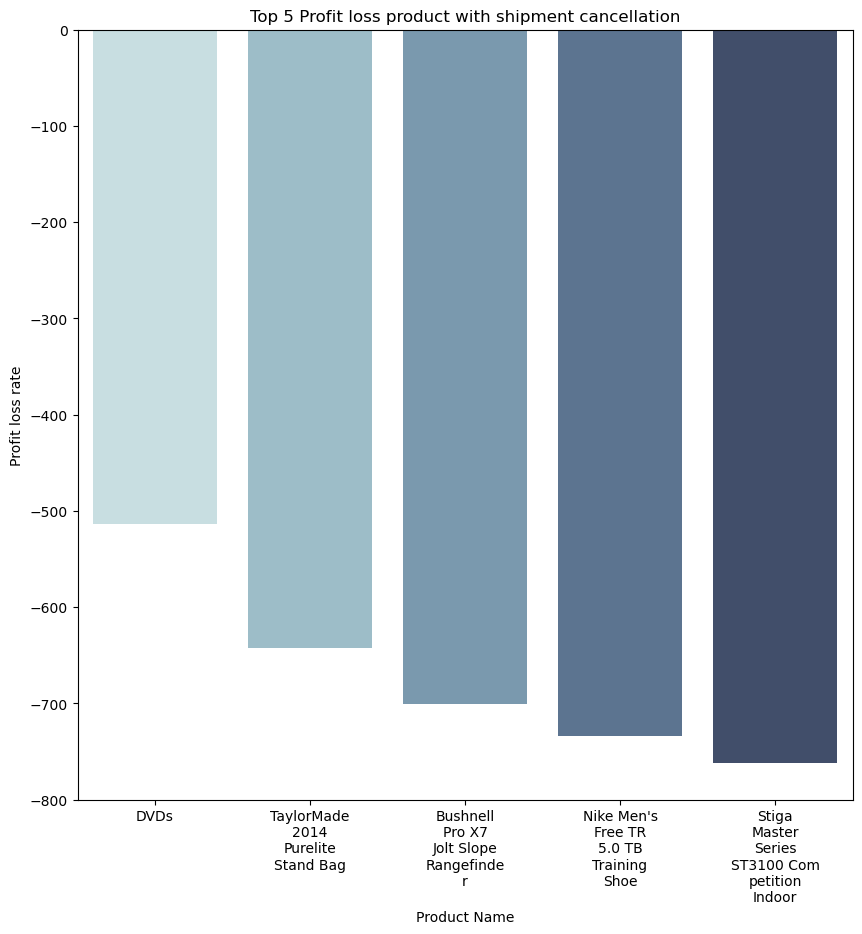

In [33]:
cc_deliveries = delay_sales[delay_sales['Delivery Status'] == 'Shipping canceled']
product_cc = cc_deliveries.groupby('Product Name')['Benefit per order'].sum().reset_index(name='profit_loss')
top_5_loss = product_cc.sort_values(by='profit_loss', ascending=False).tail(n=5)
cubehelix_palette=sns.cubehelix_palette(rot=-.2)
plt.figure(figsize=(10,10))
plt.title("Top 5 Profit loss product with shipment cancellation")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in top_5_loss['Product Name']]
ax = sns.barplot(x=wrapped_labels, y='profit_loss', data=top_5_loss,palette=cubehelix_palette)
ax.set_ylabel('Population')
plt.xlabel("Product Name")
plt.ylabel("Profit loss rate");
plt.show()

In [34]:
top_5_loss

,Product Name,profit_loss
16,DVDs,-513.399986
76,TaylorMade 2014 Purelite Stand Bag,-642.569977
8,Bushnell Pro X7 Jolt Slope Rangefinder,-700.829992
59,Nike Men's Free TR 5.0 TB Training Shoe,-734.089993
73,Stiga Master Series ST3100 Competition Indoor,-761.909973


## Order Analysis	

### Largest volumes of sales by Product

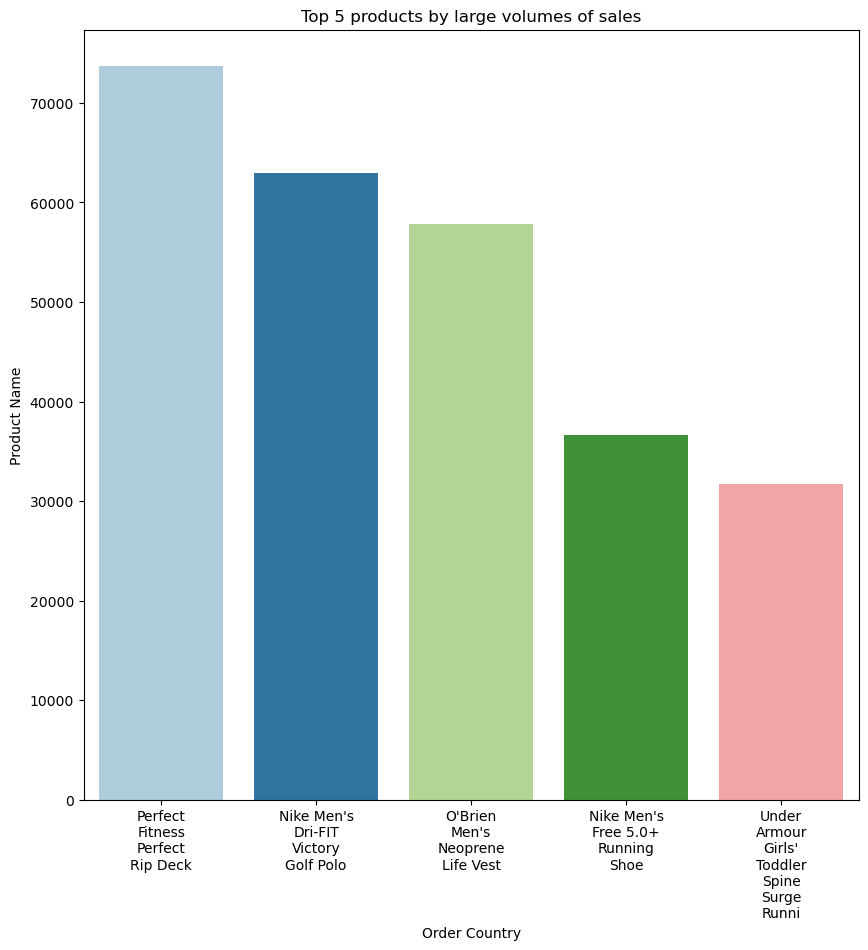

In [35]:
qt_pd = df.groupby('Product Name')['Order Item Quantity'].sum().sort_values(ascending=False)
top_qt_pd = qt_pd.head(n=5)
color_palette = sns.color_palette("Paired")
plt.figure(figsize=(10,10))
plt.title("Top 5 products by large volumes of sales")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in top_qt_pd.index]
ax = sns.barplot(x=wrapped_labels, y=top_qt_pd.values, palette=color_palette)
ax.set_xlabel('Order Country')
ax.set_ylabel('Product Name')
plt.show()

In [36]:
top_qt_pd

Product Name
Perfect Fitness Perfect Rip Deck                 73698
Nike Men's Dri-FIT Victory Golf Polo             62956
O'Brien Men's Neoprene Life Vest                 57803
Nike Men's Free 5.0+ Running Shoe                36680
Under Armour Girls' Toddler Spine Surge Runni    31735
Name: Order Item Quantity, dtype: int64

### Large volumes of orders received by Order Countries

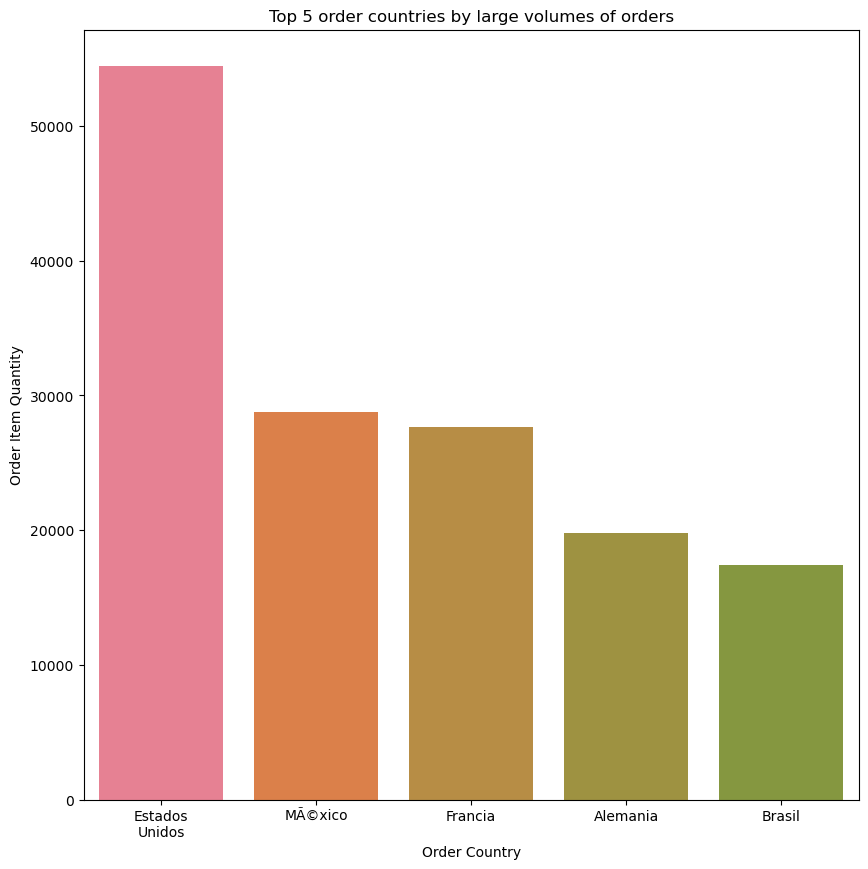

In [51]:
qt_ct = df.groupby('Order Country')['Order Item Quantity'].sum().sort_values(ascending=False)
top_qt_ct = qt_ct.head(n=5)
color_palette = sns.color_palette("husl", 15)
plt.figure(figsize=(10,10))
plt.title("Top 5 order countries by large volumes of orders")
wrapped_labels = [ '\n'.join(textwrap.wrap(label, width=10)) for label in top_qt_ct.index]
ax = sns.barplot(x=wrapped_labels, y=top_qt_ct.values, palette=color_palette)
ax.set_xlabel('Order Country')
ax.set_ylabel('Order Item Quantity')
plt.show()

In [38]:
top_qt_ct

Order Country
Estados Unidos    54433
MÃ©xico           28794
Francia           27676
Alemania          19803
Brasil            17405
Name: Order Item Quantity, dtype: int64

## Bivariate Analysis Observations
### 1. Shipment Dalay Analysis
- Late deliver by Order countries: almost 14000 orders happened to be late delivery with the order country of 'Estados Unidos', which is almost double the second late delivery order country like 'Francia' with 7341 late delivery orders.
- Late deliver by Product name: 'Perfect Fitness Perfect Rip Deck' has the highest rate of late delivery, but not much different from other top 5 late deliver products.
### 2. Shipment Cancellation Analysis
- Shipment cancellation by Product name: 'Perfect Fitness Perfect Rip Deck' has the highest rate of 1037 cancellation orders, but not much different from other top 5 late deliver products which range between 700-1000 orders. 
- Shipment cancellation by Customer: the customer id of 6953 names "Benjamin Smith" has the highest cancellation rate of 15 orders which should be aware of.
### 3. Profit and Loss Analysis
- Most profitable product: 'Field & Stream Sportsman 16 Gun Fire Safe' made the most profit at 760000 followed by Perfect Fitness Perfect Rip Deck with almost 500000. 
- Profit loss according to late delivery: with late delivery products, 'SOLE E35 Elliptical' has the highest rate of profit loss of almost 16000 overall, along with 'SOLE E25 Elliptical' with almost 15000 profit loss.
- Profit loss according to shipping cancellation: with shipping canceled products, 'Stiga Master Series ST3100 Competition Indoor' has approximately 800 loss, but not a big gap between the top 5 profit loss products with cancellation shipments which range between 800-500 dollars. 
### 4. Order Analysis
- Large volumes of sales by Products: ‘Perfect Fitness Perfect Rip Deck’ has the largest volumes of 73698 sales, while other top 5 sales volumes like Under Armour Girls' Toddler Spine Surge Runni with around 31735 sales. 
- Large volumes of orders received by Order Countries: ‘Estados Unidos’ has received the largest volumes of 54433 orders followed by México (28794), Francia (27676), Alemannia (19803), and Brasil (17405).

# Multivariate Analysis 

## Estados Unidos with Department Name and Order year

<AxesSubplot:title={'center':'Estados Unidos with Department Name and Order year'}, ylabel='Order Country,Department Name'>

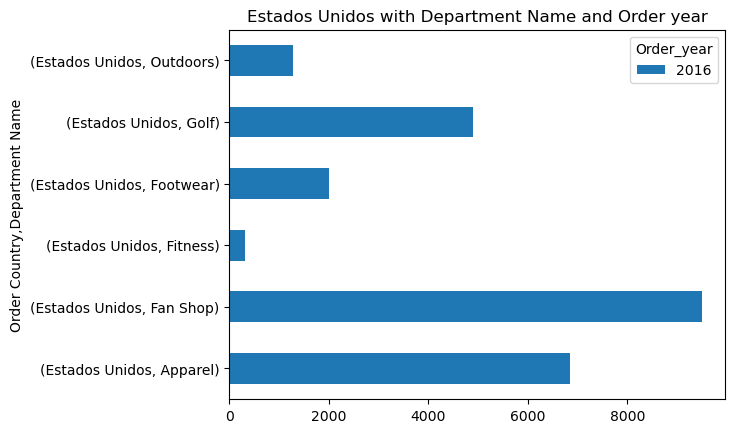

In [39]:
a = df[df['Order Country'] == 'Estados Unidos']
b=a[['Order Country','Order_year','Department Name']]
b1 = b.groupby(['Order Country','Order_year','Department Name'])['Department Name'].count()
b1.unstack(level=1).plot(kind= 'barh', stacked=True, title='Estados Unidos with Department Name and Order year')

In [40]:
A=df[['Order Country', 'Order_year']]
B = A[A['Order Country'] == 'Estados Unidos']
print(B)

         Order Country  Order_year
55      Estados Unidos        2016
56      Estados Unidos        2016
57      Estados Unidos        2016
58      Estados Unidos        2016
183     Estados Unidos        2016
...                ...         ...
179402  Estados Unidos        2016
179403  Estados Unidos        2016
179404  Estados Unidos        2016
179405  Estados Unidos        2016
179406  Estados Unidos        2016

[24840 rows x 2 columns]


## Shipment cancellation with Department Name and Payment type

<AxesSubplot:title={'center':'Shipment cancellation with Department Name and Payment type'}, ylabel='Delivery Status,Department Name'>

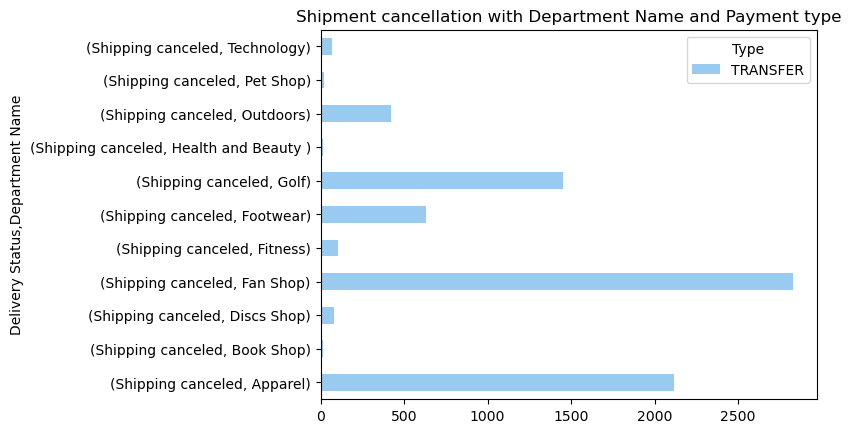

In [41]:
colors  = ['#99caef']
c = df[df['Delivery Status'] == 'Shipping canceled']
d=c[['Delivery Status','Type','Department Name']]
d1 = d.groupby(['Delivery Status','Type','Department Name'])['Type'].count()
d1.unstack(level=1).plot(kind= 'barh', stacked=True,color=colors, title='Shipment cancellation with Department Name and Payment type')

In [42]:
C = df[df['Delivery Status'] == 'Shipping canceled']
D=C[['Delivery Status','Type']]
print(D)

          Delivery Status      Type
5       Shipping canceled  TRANSFER
10      Shipping canceled  TRANSFER
23      Shipping canceled  TRANSFER
24      Shipping canceled  TRANSFER
39      Shipping canceled  TRANSFER
...                   ...       ...
180323  Shipping canceled  TRANSFER
180348  Shipping canceled  TRANSFER
180352  Shipping canceled  TRANSFER
180406  Shipping canceled  TRANSFER
180490  Shipping canceled  TRANSFER

[7754 rows x 2 columns]


## SOLE E35 Elliptical with Order region and Order year


<AxesSubplot:title={'center':'SOLE E35 Elliptical with Order region and Order year'}, ylabel='Product Name,Order Region'>

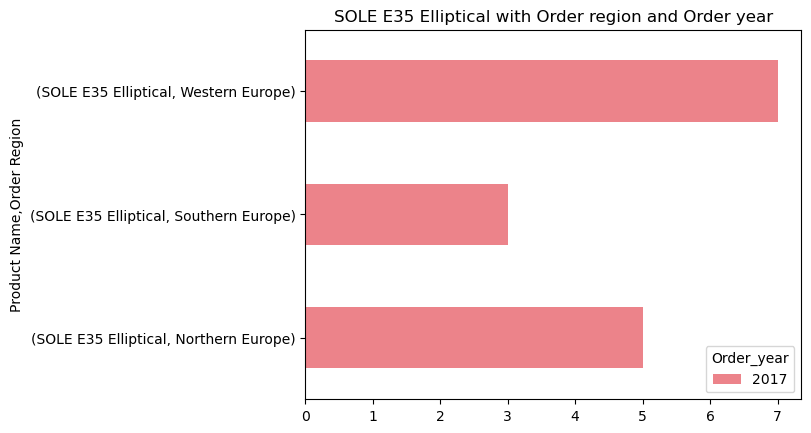

In [43]:
colors  = ['#ec838a']
e = df[df['Product Name'] == 'SOLE E35 Elliptical']
f=e[['Product Name','Order_year','Order Region']]
f1 = f.groupby(['Product Name','Order_year','Order Region'])['Order_year'].count()
f1.unstack(level=1).plot(kind= 'barh', stacked=True, color=colors, title='SOLE E35 Elliptical with Order region and Order year')

In [44]:
E = df[df['Product Name'] == 'SOLE E35 Elliptical']
F=E[['Product Name','Order_year','Order Region']]
print(F)

               Product Name  Order_year     Order Region
12606   SOLE E35 Elliptical        2017  Northern Europe
13343   SOLE E35 Elliptical        2017  Southern Europe
48281   SOLE E35 Elliptical        2017   Western Europe
59847   SOLE E35 Elliptical        2017  Northern Europe
63990   SOLE E35 Elliptical        2017  Northern Europe
82117   SOLE E35 Elliptical        2017  Southern Europe
82130   SOLE E35 Elliptical        2017   Western Europe
82161   SOLE E35 Elliptical        2017   Western Europe
83214   SOLE E35 Elliptical        2017   Western Europe
141117  SOLE E35 Elliptical        2017  Northern Europe
148405  SOLE E35 Elliptical        2017  Northern Europe
148406  SOLE E35 Elliptical        2017  Southern Europe
159182  SOLE E35 Elliptical        2017   Western Europe
173436  SOLE E35 Elliptical        2017   Western Europe
175116  SOLE E35 Elliptical        2017   Western Europe


## Customer Id of 6953 names "Benjamin Smith" with Product name and Order year


<AxesSubplot:title={'center':'Customer Id of 6953 with Product name and Order year'}, ylabel='Customer Id,Product Name'>

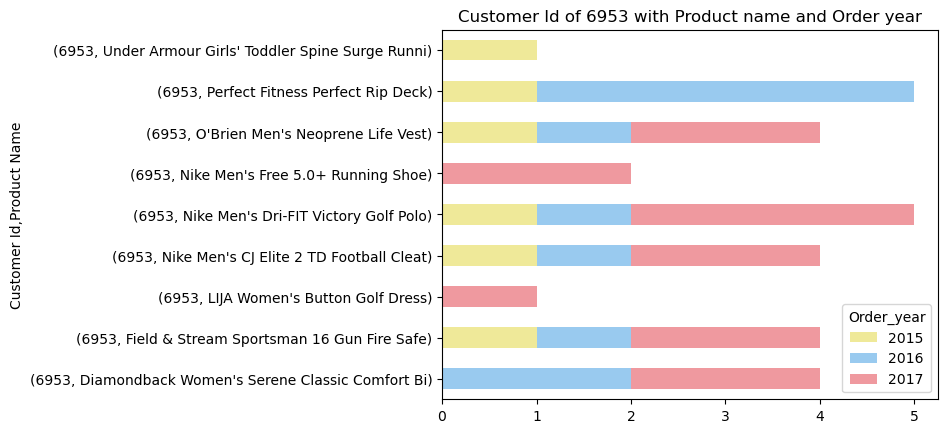

In [45]:
colors  = ['#efe999', '#99caef', '#ef999f']
g = df[df['Customer Id'] == 6953]
h=g[['Customer Id','Order_year','Product Name']]
h1 = h.groupby(['Customer Id','Order_year','Product Name'])['Order_year'].count()
h1.unstack(level=1).plot(kind= 'barh', stacked=True,color=colors, title='Customer Id of 6953 with Product name and Order year')

## Perfect Fitness Perfect Rip Deck with Delivery Status and Order year

<AxesSubplot:title={'center':'Perfect Fitness Perfect Rip Deck with Delivery Status and Order year'}, ylabel='Product Name,Order_year'>

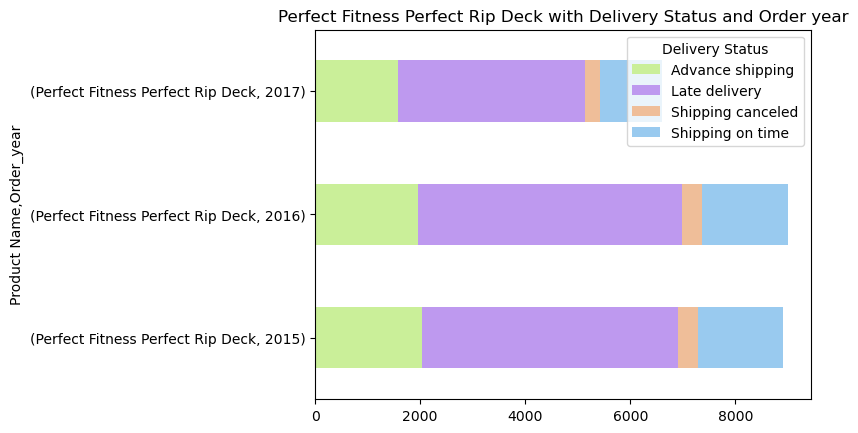

In [46]:
colors  = ['#caef99', '#be99ef', '#efbe99','#99caef']
i = df[df['Product Name'] == 'Perfect Fitness Perfect Rip Deck']
j=i[['Product Name','Delivery Status','Order_year']]
j1 = j.groupby(['Product Name','Delivery Status','Order_year'])['Order_year'].count()
j1.unstack(level=1).plot(kind= 'barh', stacked=True, color = colors, title='Perfect Fitness Perfect Rip Deck with Delivery Status and Order year')

## Multivariate Analysis Observations
### 1. Estados Unidos with Department Name and Order year
- Estados Unidos has received the largest volumes of products ordered under Fan shop department, and all the products from Estados Unidos were only ordered in 2016.
### 2. Shipment cancellation with Department Name and Payment type
- All the orders that got shipping canceled are only under Transfer payment type.
- Fan shop department has the highest rate of shipment cancellation, while Book shop, Heath & Beauty, and Pet shop are relatively lowest among other Departments.
### 3. SOLE E35 Elliptical with Order region and Order year
- SOLE E35 Elliptical has the highest profit loss, most of the orders were from Western Europe, and has been ordered only in the year 2017. 
- SOLE E35 Elliptical was ordered from Western Europe, Northern Europe, and Southern Europe respectively in 2017.
### 4. The customer id of 6953 names "Benjamin Smith" with Product name and Order year
- Benjamin Smith has been ordered most of the products in 2017 but ordered a lot of Perfect Fitness Perfect Rip Deck in 2016.
- Only Under Armour Girls' Toddler Spine Surge Runni once in 2015, and ordered LIJA Women's Argyle Golf Polo once in 2017.
### 5. Perfect Fitness Perfect Rip Deck with Delivery Status and Order year
- Perfect Fitness Perfect Rip Deck has a high rate of late delivery in all 3 years but very less Shipping canceled, it also has a similar rate of Advance shipping and Shipping on time.
- The sales rate of Perfect Fitness Perfect Rip Deck from 2015 to 2016 were stable but decreased in 2017.